## Read Data

/Users/yang/anaconda3/envs/AML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(50000, 28, 28) (50000,)


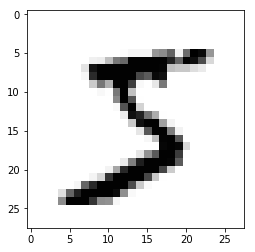

In [1]:
from preprocessed_mnist import load_dataset
X_train_ori, y_train_ori, X_val_ori, y_val_ori, X_test_ori, y_test_ori = load_dataset()
print(X_train_ori.shape, y_train_ori.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train_ori[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [3]:
# Change X into flattern vector
X_train = X_train_ori.reshape(X_train_ori.shape[0], -1).T
X_val = X_val_ori.reshape(X_val_ori.shape[0], -1).T
X_test = X_test_ori.reshape(X_test_ori.shape[0], -1).T

# Normalize X
X_train /= 255.
X_val   /= 255.
X_test  /= 255.

# Use one hot encoding for Y
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y_train_ori)+1))
y_train = label_binarizer.transform(y_train_ori).T
y_val = label_binarizer.transform(y_val_ori).T
y_test = label_binarizer.transform(y_test_ori).T

In [4]:
# check the size of traning and target data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(784, 50000)
(784, 10000)
(784, 10000)
(10, 50000)
(10, 10000)
(10, 10000)


In [10]:
# Create 3 layer neural network and initialize parameters
def initialize_parameters():
    
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", [250,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [250,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [125,250], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [125,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [10,125], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters


In [6]:
# forward propagation function
def forward_propagation(X, parameters):
    
    # create forward propagation for neural network
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Z1 = W1*X + b1
    Z1 = tf.add(tf.matmul(W1,X), b1)                       
    # A1 = relu(Z1)
    A1 = tf.nn.relu(Z1)                                    
    # Z2 = W2*A1 + b2
    Z2 = tf.add(tf.matmul(W2,A1),b2)                       
    # A2 = relu(Z2)
    A2 = tf.nn.relu(Z2)                                    
    # Z3 = W3*A2 + b3
    Z3 = tf.add(tf.matmul(W3,A2),b3)                       
    
    return Z3

In [7]:
# Compute loss function
def compute_loss(y_pred, y_target):

    logits = tf.transpose(y_pred)
    labels = tf.transpose(y_target)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

#     loss = - tf.reduce_mean(y_target * tf.log(y_pred) + (1-y_target) * tf.log(1-y_pred))
    return loss

Cost at epoch 0: 1.288962
Cost at epoch 10: 0.131877
Cost at epoch 20: 0.060631
Cost at epoch 30: 0.028991
Cost at epoch 40: 0.014548
Cost at epoch 50: 0.005226
Cost at epoch 60: 0.003244
Cost at epoch 70: 0.028541
Cost at epoch 80: 0.000803
Cost at epoch 90: 0.000396
Cost at epoch 100: 0.000274
Cost at epoch 110: 0.000179
Cost at epoch 120: 0.000129
Cost at epoch 130: 0.000088
Cost at epoch 140: 0.000072
Cost at epoch 150: 0.000048
Cost at epoch 160: 0.000036
Cost at epoch 170: 0.000027
Cost at epoch 180: 0.000020
Cost at epoch 190: 0.000015


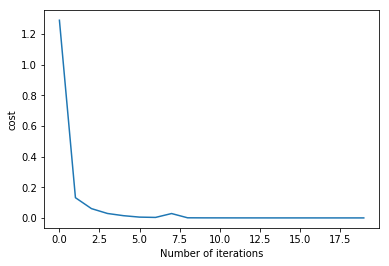

Accuracy: 0.9791


In [13]:
# Hyperparameters
num_epochs = 200
batch_size = 1000
learning_rate = 0.01

# Need to keep this to overwrite already created variables, like W1, A1
from tensorflow.python.framework import ops
ops.reset_default_graph()                         

# check cost for every 10 epochs
costs = []                                       

# Set seed for tf initialization
tf.set_random_seed(1)                

# set seed to sampling of batch    
seed = 3                          

# size of input_X and output_Y
(nx, m) = X_train.shape                          
ny = y_train.shape[0]                            
    
# Create Placeholders of X, Y
X = tf.placeholder(tf.float32, [nx, None], name = "X")
Y = tf.placeholder(tf.float32, [ny, None], name = "Y")
    
# Initialize parameters
parameters = initialize_parameters()
    
# Forward propagation
Z3 = forward_propagation(X, parameters)
    
# Cost function
cost = compute_loss(Z3, Y)
    
# Backpropagation and optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
# Initialize all the variables
init = tf.global_variables_initializer()

# start session
with tf.Session() as sess:
    
    # initialization of coefficients
    sess.run(init)
        
    # start training
    for epoch in range(num_epochs):

        epoch_cost = 0.                       
            
        # number of batches
        num_batches = m // batch_size + 1
            
        # update seed in each epoch
        seed = seed + 1
        np.random.seed(seed)

        for i in range(num_batches):
            
            # indices for random choice of each batch
            ind = np.random.choice(X_train.shape[1], batch_size)         
            batch_X = X_train[:, ind]
            batch_Y = y_train[:, ind]

            # compute the optimizer and cost
            _ , batch_cost = sess.run([optimizer, cost], feed_dict={X: batch_X, Y: batch_Y})
                
            epoch_cost += batch_cost / num_batches

        # Print cost every 10 epochs
        if epoch % 10 == 0:
            costs.append(epoch_cost)
            print ("Cost at epoch %i: %f" % (epoch, epoch_cost))
                
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('Number of iterations')
    plt.show()

    # Calculate the accuracy
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Accuracy:",  accuracy.eval({X: X_test, Y: y_test}))
        